In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [9]:

data = pd.read_csv('D:\Predictive Maintenance for Supply Chain\data\predictive_maintenance_data.csv')

In [10]:
data.head()

,Machine_ID,Operating_Hours,Temperature,Vibration,Pressure,Maintenance_Required,Failure
0,Machine_1,960,40.358507,2.106487,120.792300,0,0
1,Machine_2,3872,21.031798,1.698290,129.898737,0,0
2,Machine_3,3192,63.223953,9.360134,135.669893,0,1
3,Machine_4,566,88.092059,6.247025,102.819771,1,0
4,Machine_5,4526,96.610532,6.765156,133.287427,1,0


In [11]:
data.isnull().sum()

Machine_ID              0
Operating_Hours         0
Temperature             0
Vibration               0
Pressure                0
Maintenance_Required    0
Failure                 0
dtype: int64

In [12]:
data.describe()

,Operating_Hours,Temperature,Vibration,Pressure,Maintenance_Required,Failure
count,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2576.15880,59.311771,5.242136,90.836996,0.236200,0.130800
std,1400.16082,22.863053,2.753855,34.562275,0.424789,0.337215
min,101.00000,20.018163,0.500502,30.030295,0.000000,0.000000
25%,1361.50000,39.667218,2.847335,61.115870,0.000000,0.000000
50%,2604.00000,58.819442,5.193801,91.356206,0.000000,0.000000
75%,3772.25000,78.722536,7.670076,120.717521,0.000000,0.000000
max,4997.00000,99.956854,9.996895,149.990979,1.000000,1.000000


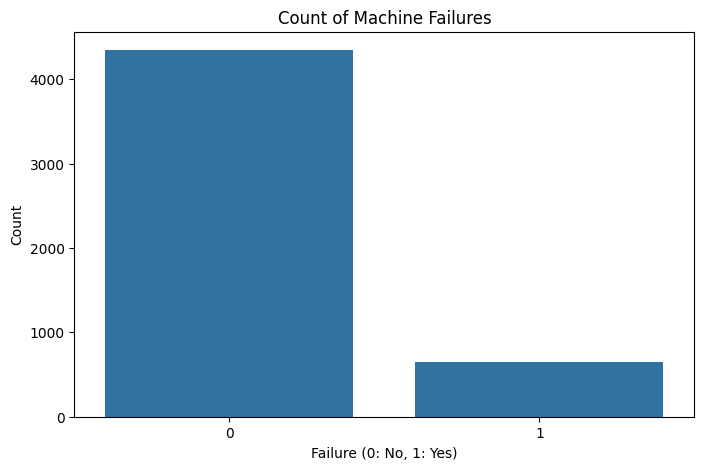

In [13]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Failure', data=data)
plt.title('Count of Machine Failures')
plt.xlabel('Failure (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

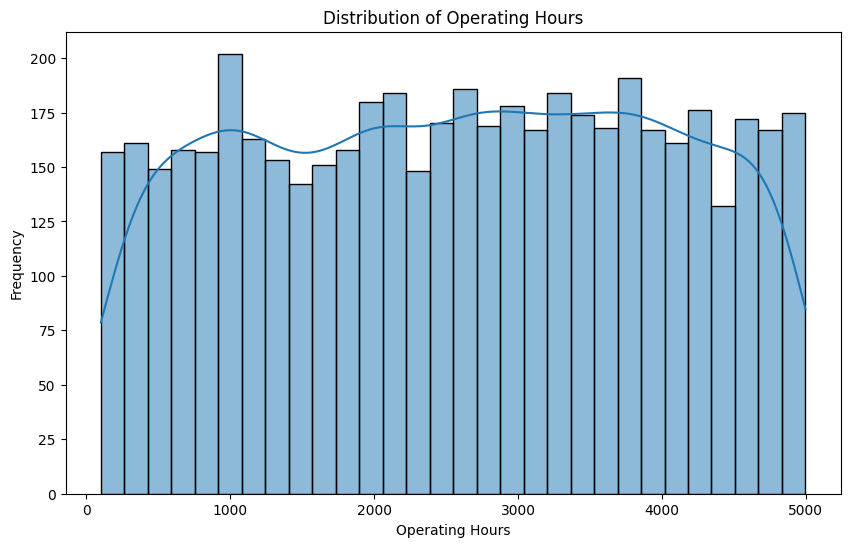

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Operating_Hours'], bins=30, kde=True)
plt.title('Distribution of Operating Hours')
plt.xlabel('Operating Hours')
plt.ylabel('Frequency')
plt.show()

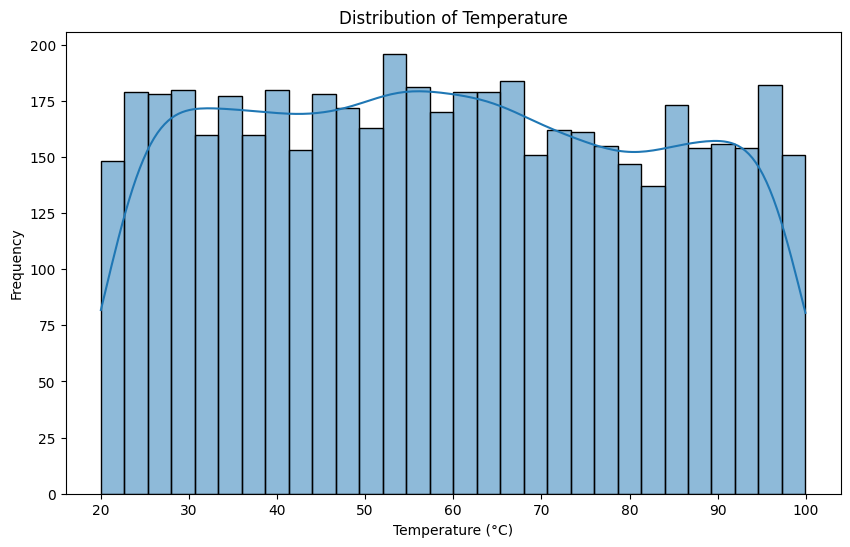

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Temperature'], bins=30, kde=True)
plt.title('Distribution of Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

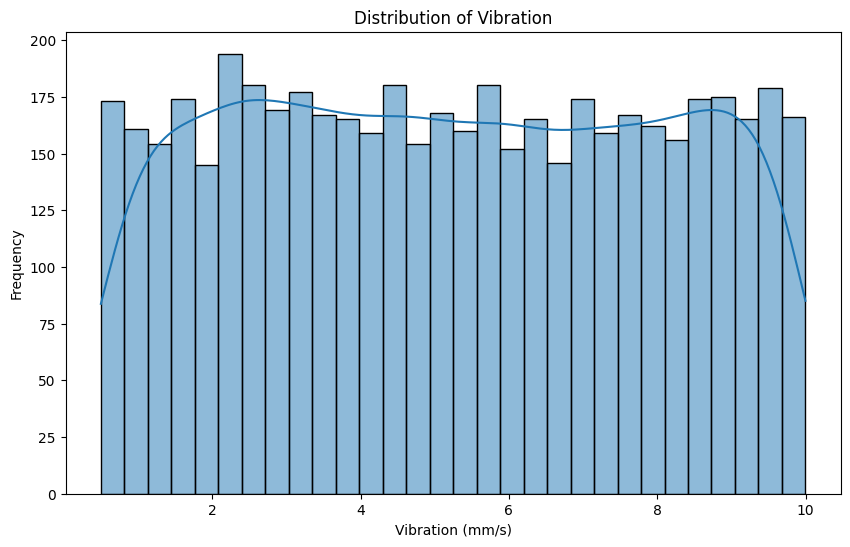

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Vibration'], bins=30, kde=True)
plt.title('Distribution of Vibration')
plt.xlabel('Vibration (mm/s)')
plt.ylabel('Frequency')
plt.show()

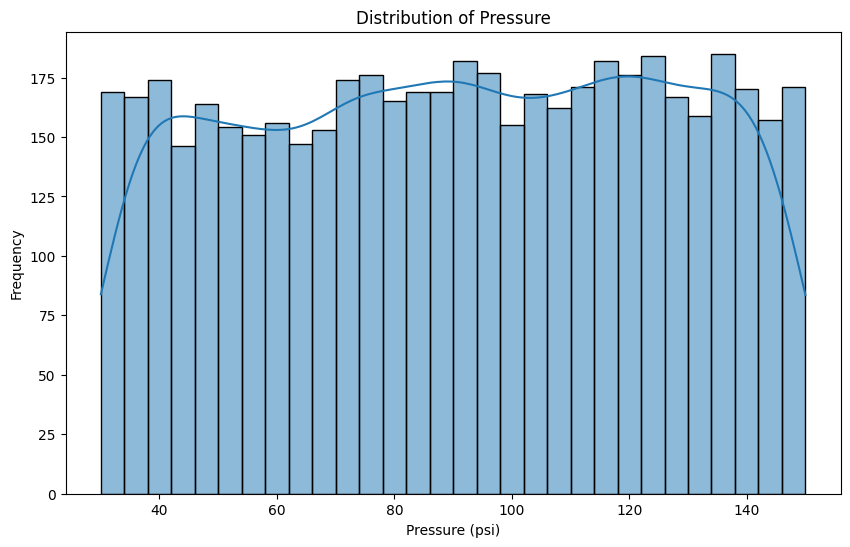

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Pressure'], bins=30, kde=True)
plt.title('Distribution of Pressure')
plt.xlabel('Pressure (psi)')
plt.ylabel('Frequency')
plt.show()

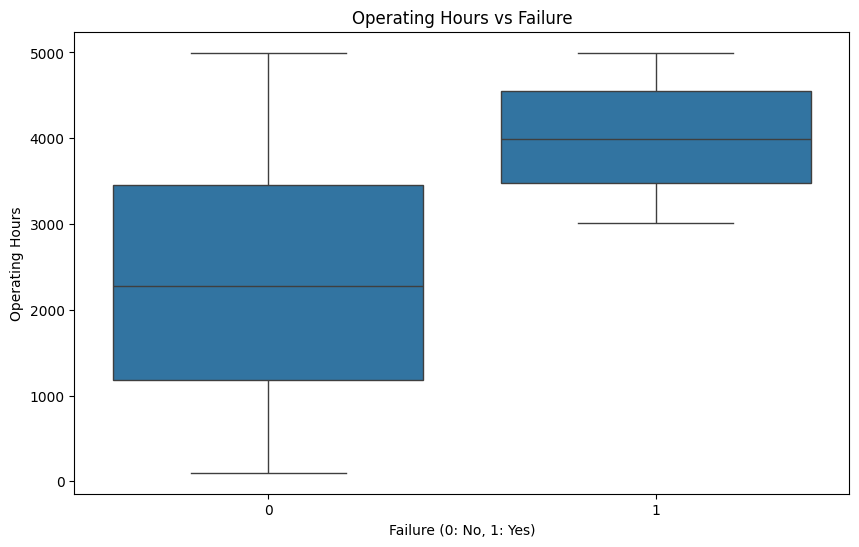

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Failure', y='Operating_Hours', data=data)
plt.title('Operating Hours vs Failure')
plt.xlabel('Failure (0: No, 1: Yes)')
plt.ylabel('Operating Hours')
plt.show()

In [20]:
Q1 = data['Operating_Hours'].quantile(0.25)
Q3 = data['Operating_Hours'].quantile(0.75)
IQR = Q3 - Q1
outlier_condition = (data['Operating_Hours'] < (Q1 - 1.5 * IQR)) | (data['Operating_Hours'] > (Q3 + 1.5 * IQR))
outliers = data[outlier_condition]

In [21]:
outliers

,Machine_ID,Operating_Hours,Temperature,Vibration,Pressure,Maintenance_Required,Failure


In [22]:
if 'Machine_ID' in data.columns:
    data['Machine_ID'] = data['Machine_ID'].astype('category')
    data['Machine_ID_Encoded'] = data['Machine_ID'].cat.codes
    print("\nEncoded Machine_ID:")
    print(data[['Machine_ID', 'Machine_ID_Encoded']].head())


Encoded Machine_ID:
  Machine_ID  Machine_ID_Encoded
0  Machine_1                   0
1  Machine_2                1111
2  Machine_3                2222
3  Machine_4                3333
4  Machine_5                4444


In [25]:
data.to_csv('D:\Predictive Maintenance for Supply Chain\data\cleaned_predictive_maintenance_data.csv', index=False)